In [1]:
import re
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import operator
import community
import numpy as np
import itertools
from __future__ import division
from collections import Counter

%matplotlib inline

In [2]:
#first part was retrieving the data which is ouputted as csv files containg
#course information for each course within each department
#next part is about creating a network of all the courses
#firstly the csv files containing the data are loaded into python
#overview of csv files content:
#checkout assignment 2 for some network analysis 

#COURSE NUMBER,COURSE NAME,LANGUAGE OF INSTRUCTION,CREDIT LOAD,YEAR,SCHEDULE,COURSE TYPE,DEPARTMENT,GENERAL COURSE OBJECTIVES,LEARNING OBJECTIVES,CONTENT,RECOMMENDED PREREQUISITES,COURSE RESPONSIBLE

rootdir='C:/Users/DRC/Desktop/social_csv_folder'
list_of_df_for_each_department={}
for filename in os.listdir(rootdir):
    if filename.endswith('.csv'):
        #print filename
        df=pd.read_csv(rootdir+'/'+filename,converters={'COURSE NUMBER': lambda x: str(x),'RECOMMENDED PREREQUISITES':lambda x: str(x)})
        list_of_df_for_each_department[filename]=df

In [3]:
#list_of_df_for_each_department.keys()

In [4]:
#sub_df=list_of_df_for_each_department['Department-of-Physics.csv']
#sub_df.loc[sub_df['COURSE NUMBER'] == 10104 ]

In [5]:
#merging all the departments into one dataframe
#merged_df=pd.concat([list_of_df_for_each_department[0],list_of_df_for_each_department[1],list_of_df_for_each_department[2],list_of_df_for_each_department[3],list_of_df_for_each_department[4],list_of_df_for_each_department[5],list_of_df_for_each_department[6],list_of_df_for_each_department[7],list_of_df_for_each_department[8],list_of_df_for_each_department[9],list_of_df_for_each_department[10],list_of_df_for_each_department[11],list_of_df_for_each_department[12],list_of_df_for_each_department[13],list_of_df_for_each_department[14],list_of_df_for_each_department[15],list_of_df_for_each_department[16],list_of_df_for_each_department[17],list_of_df_for_each_department[18],list_of_df_for_each_department[19],list_of_df_for_each_department[20]],join='inner',names='list')
merged_df=pd.concat(list_of_df_for_each_department.values(),join='inner')

In [6]:
len(merged_df.columns.values)

13

In [7]:
cleaned_merged=merged_df.dropna(thresh=len(merged_df.columns.values))

In [8]:
cleaned_merged

,COURSE NUMBER,COURSE NAME,LANGUAGE OF INSTRUCTION,CREDIT LOAD,YEAR,SCHEDULE,COURSE TYPE,DEPARTMENT,GENERAL COURSE OBJECTIVES,LEARNING OBJECTIVES,CONTENT,RECOMMENDED PREREQUISITES,COURSE RESPONSIBLE
1,27002,Life Science,Danish,5 ECTS,2016/2017,E1B (Thurs 13-17),BSc,Department of Systems Biology,\nThe students should based on the cell acquir...,"Describe the spatial, logistic, and structural...",\nThe cell as basic biological unit: structure...,None,"\nMogens Kilstrup,\nJan Martinussen"
3,27004,"Health, Diseases and Technology",Danish,10 ECTS,2016/2017,E4B (Fri 8-12) and January,BSc,Department of Systems Biology,\nThe course introduces the students to the ba...,Describe in general terms the processes in dev...,\nThe course runs through the 13- and 3-week p...,None,"\nJose Maria Gonzalez-Izarzugaza,\nLasse Folke..."
5,27007,Biotechnology and communication,Danish,10 ECTS,2016/2017,E4B (Fri 8-12) and January,BSc,Department of Systems Biology,\nThe course provides the student with insight...,Describe examples of the work areas of biotech...,\nThe course runs through the 13- and 3-week p...,None,"\nRasmus John Normand Frandsen,\nMalene Bonné ..."
7,27008,Life Science,English,5 ECTS,2016/2017,F5B (Wed 13-17),BSc,Department of Systems Biology,\nThe students should based on the cell acquir...,"Describe the spatial, logistic, and structural...",\nThe cell as basic biological unit: Structure...,None,"\nJan Martinussen,\nMogens Kilstrup"
9,27015,Introductory Project in Biotechology / Human ...,Danish,10 ECTS,2016/2017,E5A (Wed 8-12) and January,BSc,Department of Systems Biology,\nBy performing a review project within biotec...,"Perform a comprehensive literature search, to ...",\nThe topic for the project is chosen from a c...,27002,"\nClaus Sternberg,\nOle Lund"
11,27016,Design,English,5 ECTS,2016/2017,January,BSc,Department of Systems Biology,\nTo be immersed in a problem-based engineerin...,Describe the innovation and engineering proces...,\nThis course will introduce concepts of the e...,None,"\nChristopher Workman,Martin Dufva,Erik Vilain..."
13,27022,Biochemistry,Danish,5 ECTS,2016/2017,F4B (Fri 8-12),BSc,Department of Systems Biology,\nTo render the student theoretically capable ...,Describe the structures of amino acids and des...,"\nMacromolecules, membranes, and subcellular s...","27002,23932","\nMogens Kilstrup,\nJan Martinussen"
15,27023,Experimental biochemistry,Danish,5 ECTS,2016/2017,F4A (Tues 13-17) or F1B (Thurs 13-17),BSc,Department of Systems Biology,\nTo render the student capable of acquiring e...,A student who has met the objectives of the co...,"\nBiochemical, chromatographic and electrophor...",27002,\nMaher Abou Hachem
17,27026,Theoretical Molecular Microbiology,Danish,5 ECTS,2016/2017,E2A (Mon 13-17),BSc,Department of Systems Biology,\nTo give the students a basic knowledge of mi...,"Explain the mechanisms behind DNA replication,...","\nTheory: Molecular Microbiology, macromolecul...","27002,23932","\nJan Martinussen,\nClaus Sternberg"
19,27027,Exercises in Molecular Microbiology,Danish,5 ECTS,2016/2017,E4A (Tues 13-17) and E5B (Wed 13-17),BSc,Department of Systems Biology,\nTo give the students a basic knowledge of ex...,"Master basic microbiological techniques, and p...","\nMicrobial methods (basal sterile technique, ...",27026,"\nJan Martinussen,\nMogens Kilstrup"


In [9]:
cleaned_merged.loc[cleaned_merged['COURSE NUMBER'] == '10104 ']

,COURSE NUMBER,COURSE NAME,LANGUAGE OF INSTRUCTION,CREDIT LOAD,YEAR,SCHEDULE,COURSE TYPE,DEPARTMENT,GENERAL COURSE OBJECTIVES,LEARNING OBJECTIVES,CONTENT,RECOMMENDED PREREQUISITES,COURSE RESPONSIBLE
31,10104,Quantum Mechanics,English,5 ECTS,2016/2017,None,BSc,Department of Physics,\nTo establish the most basic theoretical conc...,Identify physical systems that requires a quan...,"Particles as waves, Schrödinger's equation. E...",None,"\nKirstine Berg-Sørensen,\nThomas Olsen"


In [10]:
len(list_of_df_for_each_department.keys())

21

In [11]:
#temp_df=pd.read_csv('C:/Users/DRC/Desktop/social_csv_folder/Department-of-Physics.csv')
#temp_df.loc[temp_df['COURSE NUMBER'] == 10104]
#cleaned_merged

In [12]:
#cleaned_merged.loc[cleaned_merged['RECOMMENDED PREREQUISITES'] == '2402']

In [13]:
#for i in cleaned_merged['RECOMMENDED PREREQUISITES']:
 #   if i=="2402":
  #      print i

In [14]:
list_of_nodes=cleaned_merged['COURSE NUMBER'].tolist()
#cleaned_node_list=filter(lambda v: v==v, list_of_nodes)

In [15]:
#list_of_nodes

In [16]:
#we create a dict with course names and correponding course number
#since it will come in handy later
list_of_nodes_names=cleaned_merged['COURSE NAME'].tolist()
#cleaned_node_names_list=filter(lambda v: v==v, list_of_nodes_names)

In [17]:
course_dict={}
for i in range(0,len(list_of_nodes_names)):
    course_dict[list_of_nodes[i]]=list_of_nodes_names[i]

In [18]:
# now we list the links by using the prerequisites of each course
list_of_prerequistites=cleaned_merged['RECOMMENDED PREREQUISITES'].tolist()
#cleaned__list=filter(lambda v: v==v, list_of_nodes)


In [19]:
#len(list_of_nodes)

In [20]:
#len(list_of_nodes_names)

In [21]:
#len(list_of_prerequistites)

In [22]:
#len(list_of_prerequistites)

In [23]:
#list_of_prerequistites[56]

In [24]:
list_of_teachers=cleaned_merged['COURSE RESPONSIBLE'].tolist()
#len(list_of_teachers)

In [25]:
#list_of_prerequistites[:50]

In [26]:
len(list_of_nodes)

1687

In [27]:
"""
for i in list_of_prerequistites:
    if len(i)==4 and i!="None":
        print i
"""

'\nfor i in list_of_prerequistites:\n    if len(i)==4 and i!="None":\n        print i\n'

In [28]:
#use list_of_nodes
#we create a dict that contain the nodes and its prerequisites
links_dict={}
for i in range(0,len(list_of_nodes)):
    links_dict[list_of_nodes[i]]=list_of_prerequistites[i]



In [29]:
teacher_link_dict={}
for i in range(0,len(list_of_nodes)):
    teacher_link_dict[list_of_nodes[i]]=list_of_teachers[i]

In [30]:
#teacher_link_dict.items()[10]

In [31]:
new_teacher_link_dict={}
for k,v in teacher_link_dict.items():
    new_sub_list=str(v).split(',')
    new_teacher_link_dict[k]=new_sub_list


In [32]:
#new_teacher_link_dict.items()[10]

In [33]:
#new_teacher_link_dict.values()
unique_teacher_list = dict(list(enumerate(set(list(itertools.chain(*new_teacher_link_dict.values()))))))

In [34]:
#len(unique_teacher_list)

In [35]:
temp_teacher_dict={}
for k,v in new_teacher_link_dict.items():
    for item in v:
        for key,value in unique_teacher_list.items():
            if value==item:
                temp_teacher_dict[k]=key

In [36]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(temp_teacher_dict.iteritems()):
    v[value].append(key)

In [37]:
from itertools import izip_longest
def blockwise(t, size=2, fillvalue=None):
    it = iter(t)
    return izip_longest(*[it]*size, fillvalue=fillvalue)

In [38]:
list_of_links_teachers=[]
for item in v.values():
    list_of_links_teachers.append(blockwise(item))

In [39]:
#print list(list_of_links_teachers[0])

In [40]:
list_of_teacher_tuples=[]
for i in range(0, len(list_of_links_teachers)):
    list_of_teacher_tuples.append(list(list_of_links_teachers[i]))

In [41]:
#list_of_teacher_tuples

In [42]:
cleaned_list_of_teacher_tuples = [x for x in list_of_teacher_tuples if x != []]

In [43]:
flat_teacher_list = list(itertools.chain(*cleaned_list_of_teacher_tuples))

In [44]:
#flat_teacher_list

In [45]:
#links_list_dict
G=nx.DiGraph()
G.add_nodes_from(list_of_nodes)
G.add_edges_from(flat_teacher_list)


In [46]:
#flat_teacher_list

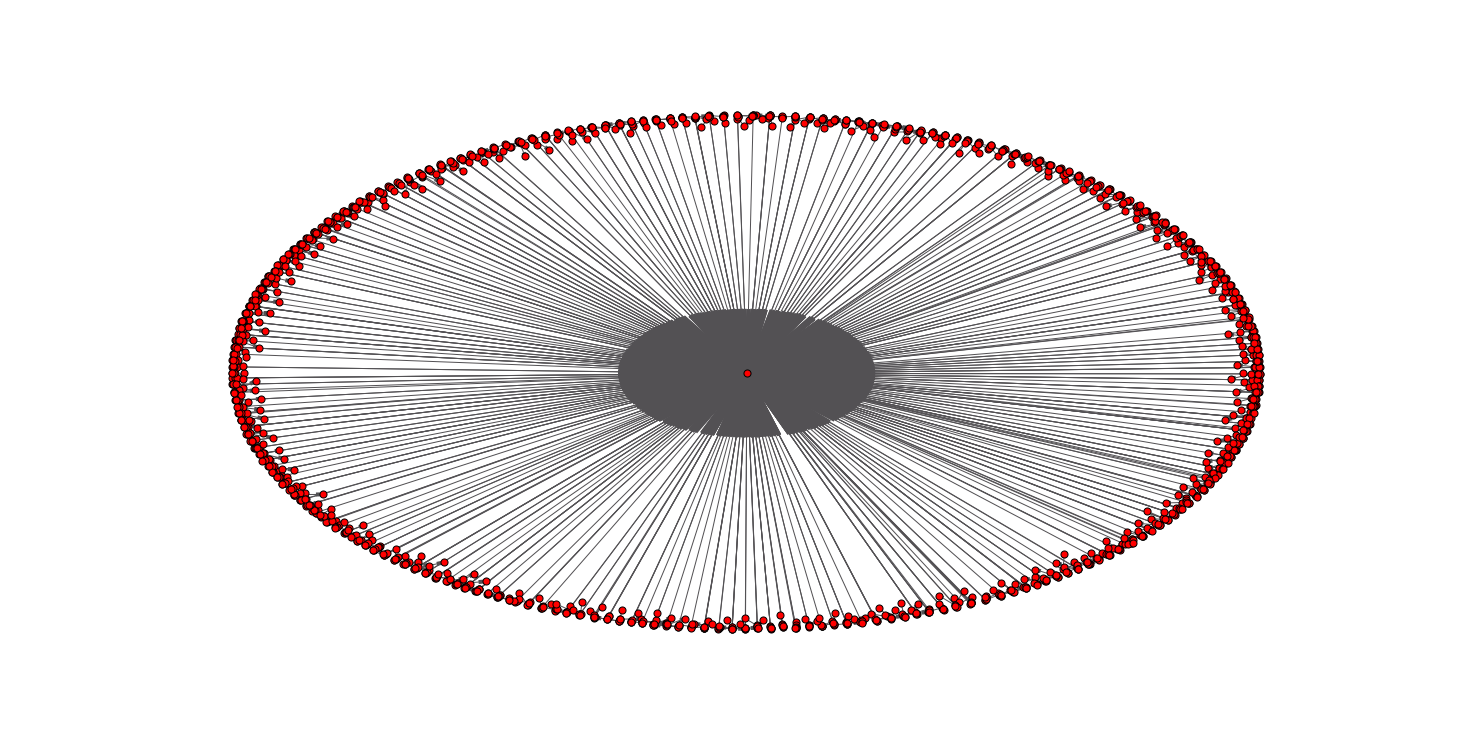

In [47]:
pos = pos=nx.spring_layout(G, scale=5)
plt.figure(num=None, figsize=(20, 10), dpi=1500)
nx.draw(G,pos, edge_color='#535154',node_size=50)
plt.show()

In [48]:
import operator
x=nx.betweenness_centrality(G)
sorted_x = sorted(x.items(), key=operator.itemgetter(1))


In [49]:
#links_dict.items()[45]

In [50]:
#re.findall('\d+',links_dict.values()[45])

In [51]:
#the prerequistites (represented by course number) are in a string format, so it is neccessary to utilize a reqular expression to extract the course numbers in each "string" of course numbers (courses that are prerequisites) and list them in a pythong list numerical objcet
#this extraction code ignores and passes prerequisites that are nan or none values i.e. non-existent prerequisites (no outgoing links). 
new_dict_list_of_links={}
for k,v in links_dict.items():
    try:
        temp_list=re.findall('\(?([0-9A-Za-z]+)\)?',v)
        new_dict_list_of_links[k]=temp_list
    except TypeError:
        pass

In [52]:
#new_dict_list_of_links

In [53]:
#new_dict_list_of_links.items()[45]

In [54]:
#new_dict_list_of_links[41078.0]

In [55]:
#for i in new_dict_list_of_links[41078.0]:
#    print i

In [56]:
print new_dict_list_of_links.items()

[('34153 ', ['34020', '34033', '34032', '10370']), ('28242 ', ['28160', '28020', '28140', '26222', '01035']), ('12701 ', ['None']), ('62581 ', ['62450', '62420']), ('31384 ', ['02101', '31388', '31371']), ('42002 ', ['01005']), ('42011 ', ['None']), ('02102', ['None']), ('02101', ['None']), ('62570 ', []), ('02105', ['01017', '01917']), ('10036 ', ['01005', '10033']), ('62549 ', ['62432', '62402']), ('11031 ', ['11990', '11000', '11951']), ('11946 ', ['None']), ('42062 ', ['42042']), ('KU105 ', ['None']), ('34539 ', ['34041']), ('KU005 ', ['01005', '02631', '01035']), ('KU012 ', ['None']), ('88701 ', []), ('11000 ', ['None']), ('28123 ', ['28020', '28022']), ('24003 ', []), ('31547 ', ['31545']), ('42490 ', ['None']), ('30530 ', ['None']), ('28892 ', []), ('62338 ', ['None']), ('62T25 ', []), ('42177 ', ['None']), ('11951 ', []), ('62739 ', ['62738']), ('42B70 ', ['None']), ('62238 ', []), ('02941', ['02562']), ('34493 ', []), ('12121 ', ['41102', '12102', '12134']), ('47326 ', ['47325

In [57]:
#print new_dict_list_of_links.values()

In [58]:
#creating the graph using this dictionairy with nodes as keys and links as lists
G2=nx.DiGraph(new_dict_list_of_links)
#nx.draw(G)

In [59]:
#number of_edges
len(G2.edges())

3279

In [60]:
#number of nodes
len(G2.nodes())

2424

In [61]:
#list of tuples
list_of_links=G2.edges()

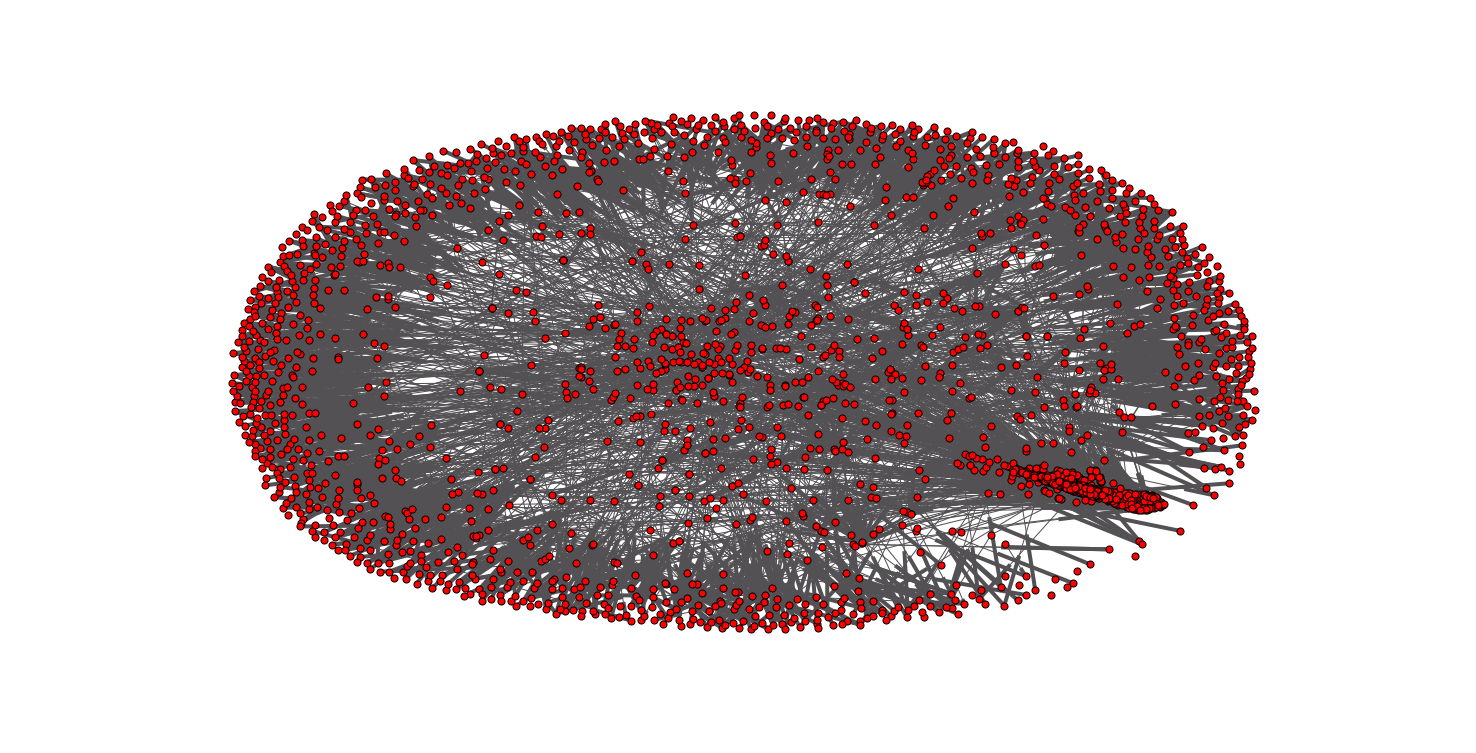

In [62]:
pos = pos=nx.spring_layout(G2, scale=5)
plt.figure(num=None, figsize=(20, 10), dpi=1500)
nx.draw(G2,pos, edge_color='#535154',node_size=50)
plt.show()

In [63]:
betweenness_cen_course=nx.betweenness_centrality(G2)
betweenness_cen_course

{'34153 ': 0.0,
 '28242 ': 0.0,
 '12701 ': 0.0,
 '62581 ': 0.0,
 '31384 ': 0.0,
 '42002 ': 0.0,
 '42011 ': 0.0,
 '62505 ': 0.0,
 '02102': 2.683817653078995e-06,
 '02100': 0.0,
 '02101': 3.976026152709622e-06,
 '62570 ': 0.0,
 '02105': 8.860858283181443e-06,
 '10036 ': 0.0,
 '62549 ': 0.0,
 '28233 ': 0.0,
 '11946 ': 0.0,
 '42062 ': 0.0,
 '42458': 0.0,
 '12104': 0.0,
 'KU105 ': 0.0,
 '34539 ': 0.0,
 'KU005 ': 0.0,
 'KU012 ': 0.0,
 '88701 ': 0.0,
 '11000 ': 0.0,
 '62579 ': 0.0,
 '28123 ': 0.0,
 '24003 ': 0.0,
 '31547 ': 0.0,
 '42490 ': 0.0,
 '13544': 0.0,
 '13540': 0.0,
 '30530 ': 0.0,
 '28892 ': 0.0,
 '62338 ': 0.0,
 '42051': 0.0,
 '62T25 ': 0.0,
 '26371': 0.0,
 '42177 ': 0.0,
 '42582': 0.0,
 '42580': 0.0,
 '11951 ': 0.0,
 '11765': 0.0,
 '10305 ': 0.0,
 '62739 ': 0.0,
 '62516': 0.0,
 '62515': 0.0,
 '62514': 0.0,
 '62511': 0.0,
 '62510': 0.0,
 '42B70 ': 0.0,
 '62238 ': 0.0,
 '02941': 0.0,
 '34493 ': 0.0,
 '42631': 0.0,
 '12121 ': 0.0,
 '28415': 0.0,
 '47326 ': 0.0,
 '31540 ': 0.0,
 '26027

In [64]:
import operator
sorted_x = sorted(betweenness_cen_course.items(), key=operator.itemgetter(1))
sorted_x[-1]

('41501', 6.838764982660551e-05)

In [65]:
deg_cen=nx.degree_centrality(G2)
in_deg_cen=nx.in_degree_centrality(G2)
out_deg_cen=nx.out_degree_centrality(G2)
between_cen=nx.betweenness_centrality(G2)
edge_betw_cen=nx.edge_betweenness_centrality(G2)
eigen_cen=nx.eigenvector_centrality(G2)

In [66]:

sorted_in_deg = sorted(in_deg_cen.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "The Course named: %s. \t Betweenness centrality value is: %s." %(sorted_in_deg[i][0],sorted_in_deg[i][1])



The Course named: None. 	 Betweenness centrality value is: 0.210482872472.
The Course named: 01005. 	 Betweenness centrality value is: 0.0255881139084.
The Course named: 02631. 	 Betweenness centrality value is: 0.01774659513.
The Course named: 02402. 	 Betweenness centrality value is: 0.0148576145274.
The Course named: 02633. 	 Betweenness centrality value is: 0.0144449030128.


In [67]:
sorted_out_deg = sorted(out_deg_cen.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "The Course named: %s. \t Betweenness centrality value is: %s." %(sorted_out_deg[i][0],sorted_out_deg[i][1])


The Course named: 62233 . 	 Betweenness centrality value is: 0.00907965332233.
The Course named: 11080 . 	 Betweenness centrality value is: 0.00619067271977.
The Course named: 02526. 	 Betweenness centrality value is: 0.00577796120512.
The Course named: 41663. 	 Betweenness centrality value is: 0.00536524969047.
The Course named: 41612. 	 Betweenness centrality value is: 0.00536524969047.


In [68]:
WC=list(nx.weakly_connected_component_subgraphs(G))

In [69]:
largest = max(nx.weakly_connected_component_subgraphs(G2),key=len)

In [70]:
#[len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]

In [71]:
#largest_cc = max(nx.weakly_connected_components(G), key=len)

In [72]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package
in_eigen_centrality = nx.eigenvector_centrality(G2)
out_eigen_centrality = G2.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)

In [73]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
betweenness_centrality_dict = nx.betweenness_centrality(G2)
sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)


In [74]:
#in_degrees=list(G.in_degree().values())
#out_degrees=list(G.out_degree().values())
#degree values
#degrees=list(G.degree().values())

In [92]:
#using  networkx to create the prober subgraph using the weakly connected component (WCC)
#generating corresponding undirected graph to the philosopher directed graph

G3 = max(nx.weakly_connected_component_subgraphs(G2,copy=True),key=len)
H = G3.to_undirected()

In [93]:
#networkx function to get the assortativity
r = nx.degree_assortativity_coefficient(H)
print "Assortativity of the undirected graph: %s" %r

Assortativity of the undirected graph: -0.116340900112


In [94]:
#using the community package to calculate the modularity using the Louvain-algroithm
#for directed graphs the partition has to be set manually. in our case we can set it to represent the 21 departments
#part = community.best_partition(H)


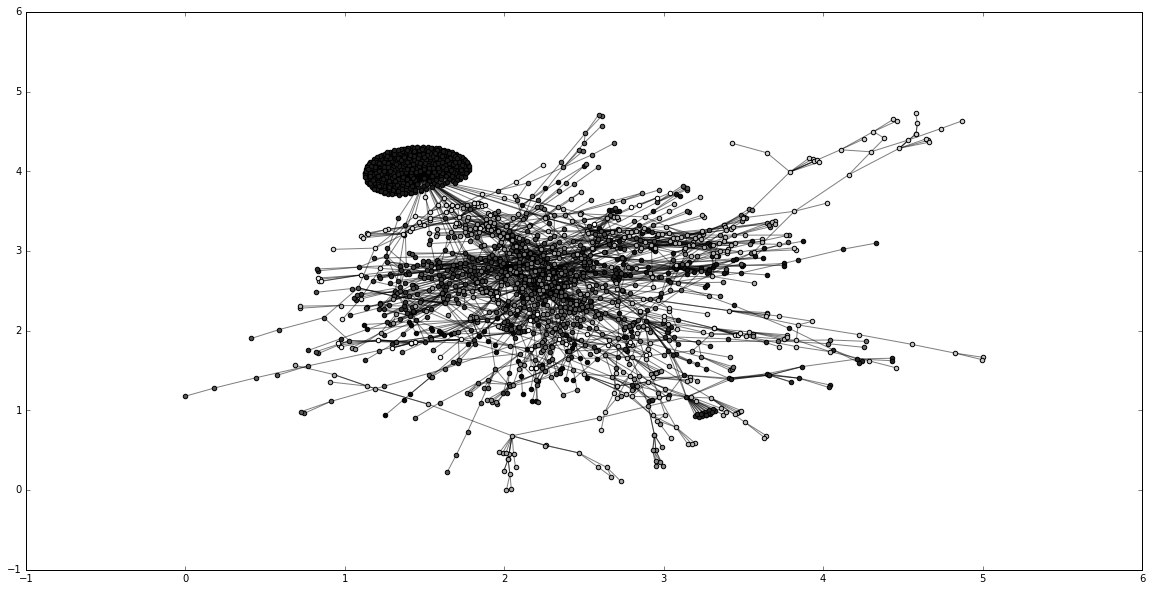

In [95]:
#first compute the best partition
partition = community.best_partition(H)

#drawing
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
size = float(len(set(partition.values())))
pos=nx.spring_layout(H, scale=5)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20, node_color = str(count / size))

nx.draw_networkx_edges(H,pos,alpha=0.5)
plt.show()

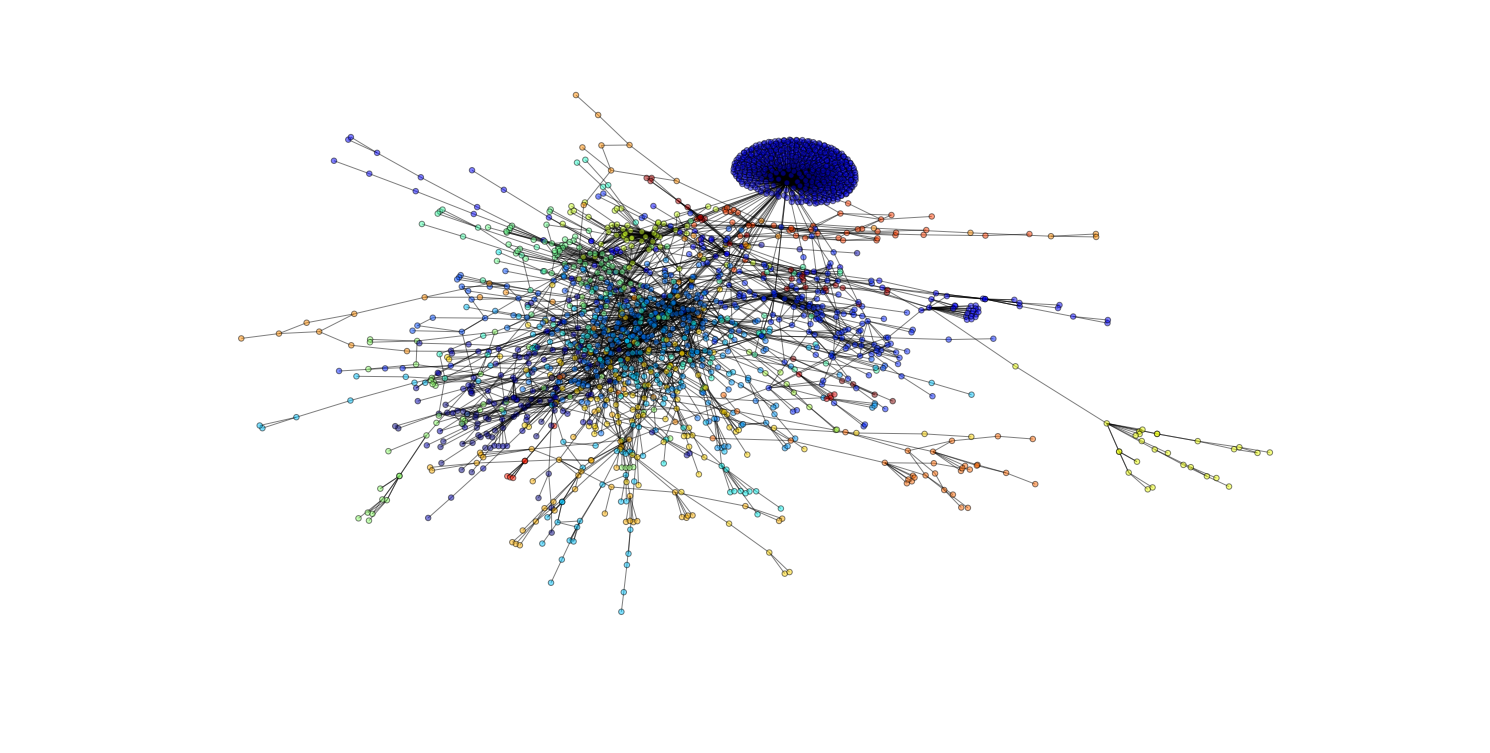

In [96]:
part = community.best_partition(H)
pos=nx.spring_layout(H, scale=5)
values = [part.get(node) for node in H.nodes()]
plt.figure(num=None, figsize=(20, 10), dpi=1500)    
nx.draw_spring(H, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False,alpha=0.5)
plt.show()

In [97]:
mod = community.modularity(part,H)
print("modularity:", mod)

('modularity:', 0.8158439977230562)


In [81]:
#shortest paths
shortest_p=nx.shortest_path(G2)


In [82]:
#weakly connected
#G = max(nx.weakly_connected_component_subgraphs(G,copy=True),key=len)
#giant connected
#H = max(nx.connected_component_subgraphs(H,copy=True), key=len)

In [83]:
#getting the betweennness centrality of the philosophers in the philosopherrs network generated above using netwrokx package
betweenness_centrality_dict = nx.betweenness_centrality(G2)
#betweenness_centrality_dict = nx.betweenness_centrality(H)

sorted_betweenness_centrality = sorted(betweenness_centrality_dict.items(), key=operator.itemgetter(1),reverse=True)
for i in range(5):
    print "The Course named: %s. \t Betweenness centrality value is: %s." %(sorted_betweenness_centrality[i][0],sorted_betweenness_centrality[i][1])

The Course named: 41501. 	 Betweenness centrality value is: 6.83876498266e-05.
The Course named: 01035. 	 Betweenness centrality value is: 3.8916370262e-05.
The Course named: 41612. 	 Betweenness centrality value is: 2.52193658829e-05.
The Course named: 41502. 	 Betweenness centrality value is: 2.4835963361e-05.
The Course named: 41401. 	 Betweenness centrality value is: 1.78921176872e-05.


In [84]:
#Getting eigenvalue centrality for each node(philosopher) in-degree and out-degree using the networkx package

in_eigen_centrality = nx.eigenvector_centrality(G2)
out_eigen_centrality = G2.reverse()
out_eigen_centrality = nx.eigenvector_centrality(out_eigen_centrality)
sorted_in_eigen_centrality= sorted(in_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
sorted_out_eigen_centrality= sorted(out_eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)


In [85]:

for i in range(5):
    print "The course name is: %s. \t \t  In-degree Eigenvector centrality value is: %s." %(sorted_in_eigen_centrality[i][0],sorted_in_eigen_centrality[i][1])


The course name is: 02315. 	 	  In-degree Eigenvector centrality value is: 0.773952776053.
The course name is: 02313. 	 	  In-degree Eigenvector centrality value is: 0.539486419404.
The course name is: 02312. 	 	  In-degree Eigenvector centrality value is: 0.234471735244.
The course name is: 02314. 	 	  In-degree Eigenvector centrality value is: 0.23446635665.
The course name is: None. 	 	  In-degree Eigenvector centrality value is: 0.000150600630526.


In [86]:

for i in range(5):
    print "The course name is: %s. \t \t Out-degree Eigenvector centrality value is: %s." %(sorted_out_eigen_centrality[i][0],sorted_out_eigen_centrality[i][1])


The course name is: 02368. 	 	 Out-degree Eigenvector centrality value is: 0.41100718222.
The course name is: 02313. 	 	 Out-degree Eigenvector centrality value is: 0.373306162536.
The course name is: 62583 . 	 	 Out-degree Eigenvector centrality value is: 0.356961713155.
The course name is: 62584 . 	 	 Out-degree Eigenvector centrality value is: 0.356961713155.
The course name is: 02315. 	 	 Out-degree Eigenvector centrality value is: 0.286571794708.


In [87]:
#the shortest path can show which courses you have to have to gain acess to a specific course
#shortest_p

In [88]:
lenght_list=[]
for key,value in nx.shortest_path_length(G2).items():
    for k2,v2 in value.items():
        lenght_list.append(v2)

In [89]:
lenght_list[6]

1

In [90]:
from collections import Counter
C1=Counter(lenght_list)
dic_C1=dict(C1)

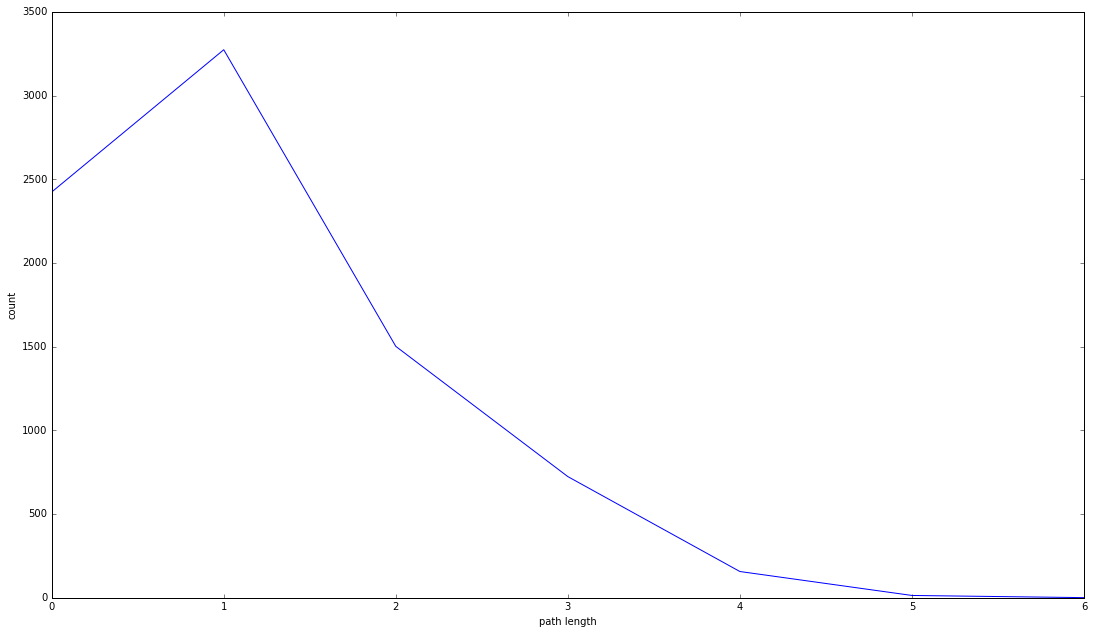

In [91]:
#Plotting the distrubution of lenghts
plt.plot(dic_C1.values())
plt.ylabel('count')
plt.xlabel('path length')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

In [92]:
#create another with teachers as links

In [93]:
"""
import urllib2
import requests
url='http://kurser.dtu.dk/search?CourseCode=&SearchKeyword=&SchedulePlacement=&Department=41&CourseType=&TeachingLanguage='
req=requests.get(url)
"""

"\nimport urllib2\nimport requests\nurl='http://kurser.dtu.dk/search?CourseCode=&SearchKeyword=&SchedulePlacement=&Department=41&CourseType=&TeachingLanguage='\nreq=requests.get(url)\n"

In [94]:
#from selenium import webdriver
#driver = webdriver.Chrome()

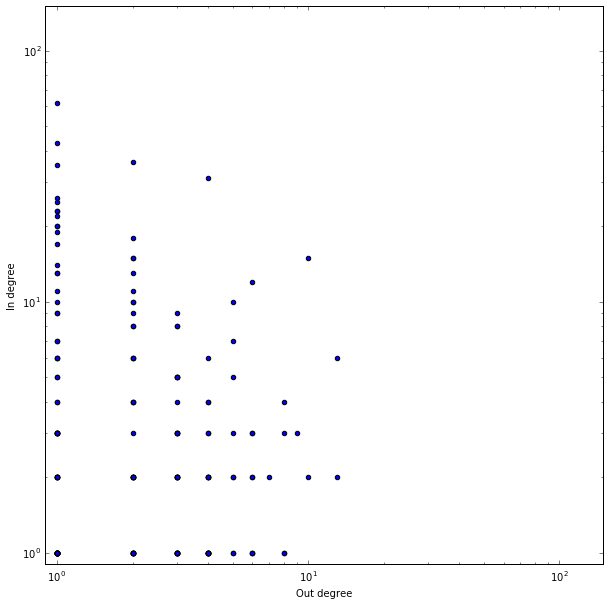

In [95]:
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
plt.scatter(G2.out_degree().values(), 
            G2.in_degree().values())
plt.xlabel('Out degree')
plt.ylabel('In degree')
plt.xscale('log')
plt.yscale('log')
#plt.axis([-2,55,-2,140])
#plt.axis([0,15,0,20])
plt.xlim(0.0, 10.)
#plt.ylim(0.,10.)
plt.xlim(9e-1, 1.5e2)
plt.ylim(9e-1, 1.5e2)
plt.show()

In [96]:
#For looking at the differences
for outd, ind in zip(G2.out_degree().items(),
                     G2.in_degree().items()):
    if outd[1] > 10 and ind[1] < 2:
        print outd[0], 'has ingoing degree', ind[1],'and outdoing degree', outd[1]

11080  has ingoing degree 0 and outdoing degree 15
42086  has ingoing degree 0 and outdoing degree 11
62193  has ingoing degree 0 and outdoing degree 11
62233  has ingoing degree 0 and outdoing degree 22
02526 has ingoing degree 0 and outdoing degree 14
30740  has ingoing degree 0 and outdoing degree 11
41663 has ingoing degree 0 and outdoing degree 13
30742  has ingoing degree 0 and outdoing degree 11
11375  has ingoing degree 0 and outdoing degree 12


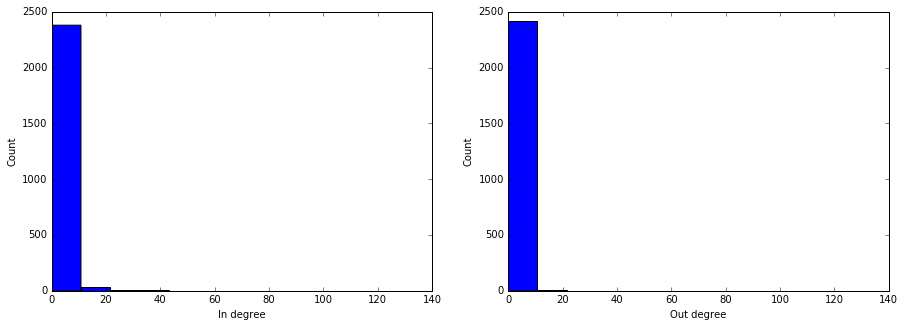

In [97]:
plt.figure(figsize=(15, 5), facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.hist(G2.in_degree().values(), bins=np.linspace(0,140,14))
plt.xlabel("In degree")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(G2.out_degree().values(), bins=np.linspace(0,140,14))
plt.xlabel("Out degree")
plt.ylabel("Count")
plt.show()

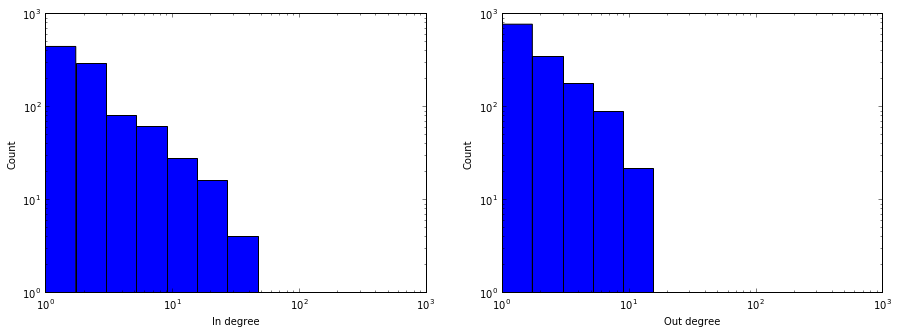

In [98]:
plt.figure(figsize=(15, 5), facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.hist(G2.in_degree().values(), bins=np.logspace(0,2.15,10))
plt.xlabel("In degree")
plt.ylabel("Count")
plt.xscale('log')
plt.yscale('log')

plt.subplot(1,2,2)
plt.hist(G2.out_degree().values(), bins=np.logspace(0,2.15,10))
plt.xlabel("Out degree")
plt.ylabel("Count")
plt.xscale('log')
plt.yscale('log')
plt.show()